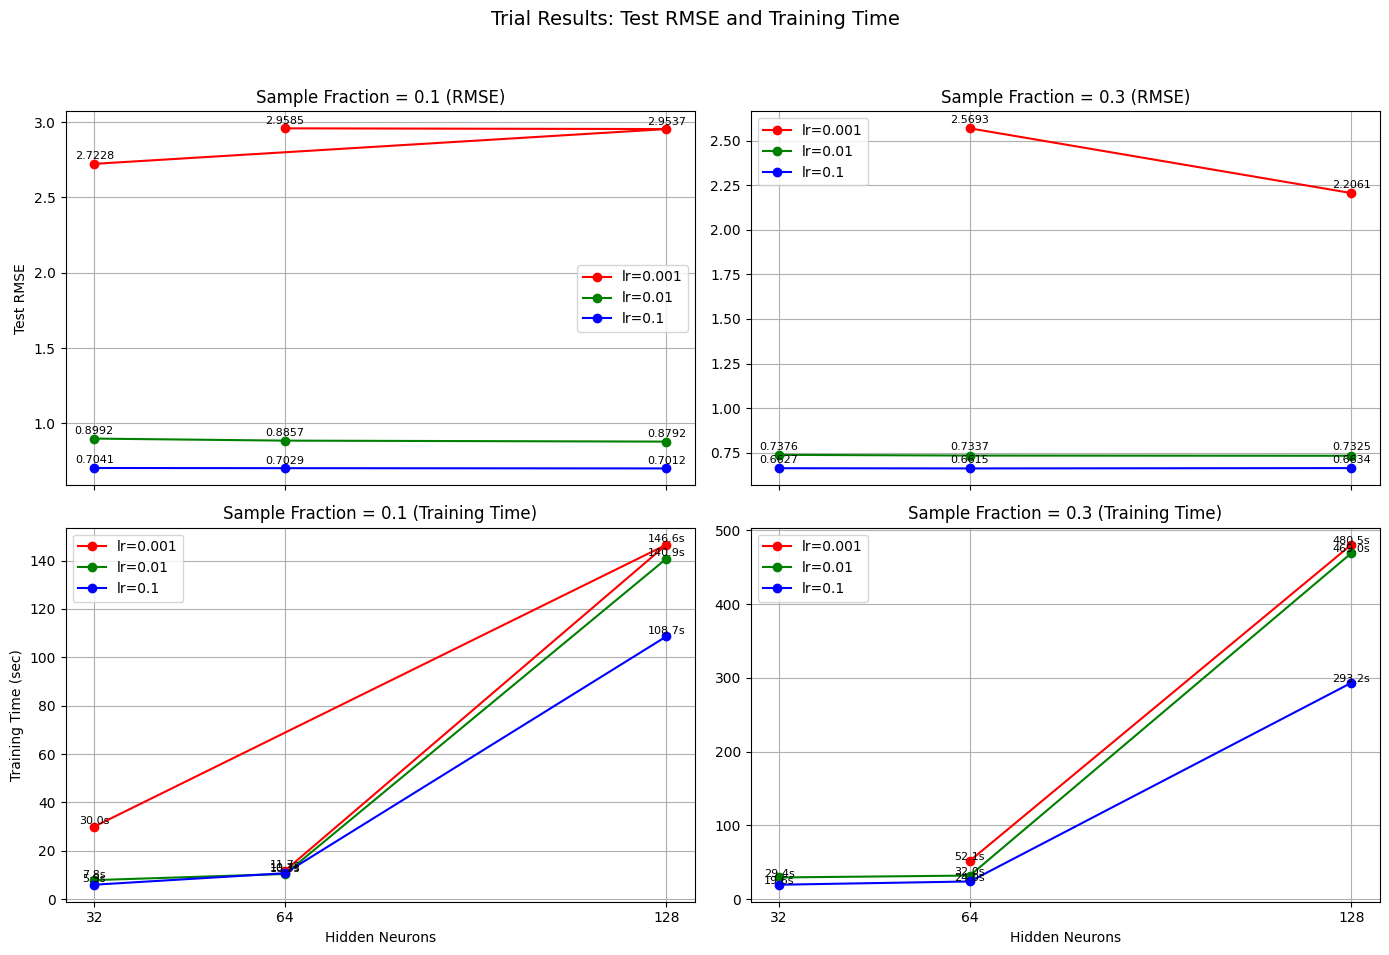

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("sgd_training_results_trial.csv")

# Split the data by row index (sample_fraction = 0.1: rows 2–10, 0.3: rows 11–19)
df_01 = df.iloc[1:10].copy()
df_03 = df.iloc[10:19].copy()

# Set up subplots (2 rows x 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Define colors by learning rate
colors = {0.001: "red", 0.01: "green", 0.1: "blue"}

# --------- Row 1: Test RMSE ----------
for lr in sorted(df_01["learning_rate"].unique()):
    sub = df_01[df_01["learning_rate"] == lr]
    axs[0, 0].plot(sub["hidden_dim"], sub["test_rmse"], marker='o', label=f"lr={lr}", color=colors[lr])
    for x, y in zip(sub["hidden_dim"], sub["test_rmse"]):
        axs[0, 0].text(x, y + 0.03, f"{y:.4f}", ha='center', fontsize=8)

axs[0, 0].set_title("Sample Fraction = 0.1 (RMSE)")
axs[0, 0].set_ylabel("Test RMSE")
axs[0, 0].grid(True)
axs[0, 0].legend()

for lr in sorted(df_03["learning_rate"].unique()):
    sub = df_03[df_03["learning_rate"] == lr]
    axs[0, 1].plot(sub["hidden_dim"], sub["test_rmse"], marker='o', label=f"lr={lr}", color=colors[lr])
    for x, y in zip(sub["hidden_dim"], sub["test_rmse"]):
        axs[0, 1].text(x, y + 0.03, f"{y:.4f}", ha='center', fontsize=8)

axs[0, 1].set_title("Sample Fraction = 0.3 (RMSE)")
axs[0, 1].grid(True)
axs[0, 1].legend()

# --------- Row 2: Training Time ----------
for lr in sorted(df_01["learning_rate"].unique()):
    sub = df_01[df_01["learning_rate"] == lr]
    axs[1, 0].plot(sub["hidden_dim"], sub["training_time_sec"], marker='o', label=f"lr={lr}", color=colors[lr])
    for x, y in zip(sub["hidden_dim"], sub["training_time_sec"]):
        axs[1, 0].text(x, y + 1, f"{y:.1f}s", ha='center', fontsize=8)

axs[1, 0].set_title("Sample Fraction = 0.1 (Training Time)")
axs[1, 0].set_xlabel("Hidden Neurons")
axs[1, 0].set_ylabel("Training Time (sec)")
axs[1, 0].grid(True)
axs[1, 0].legend()

for lr in sorted(df_03["learning_rate"].unique()):
    sub = df_03[df_03["learning_rate"] == lr]
    axs[1, 1].plot(sub["hidden_dim"], sub["training_time_sec"], marker='o', label=f"lr={lr}", color=colors[lr])
    for x, y in zip(sub["hidden_dim"], sub["training_time_sec"]):
        axs[1, 1].text(x, y + 1, f"{y:.1f}s", ha='center', fontsize=8)

axs[1, 1].set_title("Sample Fraction = 0.3 (Training Time)")
axs[1, 1].set_xlabel("Hidden Neurons")
axs[1, 1].grid(True)
axs[1, 1].legend()

# Common settings
for ax in axs.flat:
    ax.set_xticks([32, 64, 128])


fig.suptitle("Trial Results: Test RMSE and Training Time", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()